<a href="https://colab.research.google.com/github/lhcbernardes/fiap-ia/blob/main/desafio_inicial_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Conversão de variáveis categóricas
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['region'] = df['region'].astype('category').cat.codes

In [ ]:
# Verificando dados duplicados
duplicados = df[df.duplicated()]
df.drop_duplicates(inplace=True)
print(f"Duplicados encontrados: {len(duplicados)}")
print(duplicados)

Duplicados encontrados: 1
     age  sex    bmi  children  smoker  region    charges
581   19    1  30.59         0       0       1  1639.5631


In [ ]:
# Estatísticas descritivas
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1337.000000   1337.000000  
mean      1.516081  13279.121487  
std       1.105208  12110.359656  
min       0.000000   1121.873900  
25%       1.000000   4746.344000  
50%       2.000000   9386.161300  
75%       2.000000  16657.717450  
max       3.000000  63770.428010  


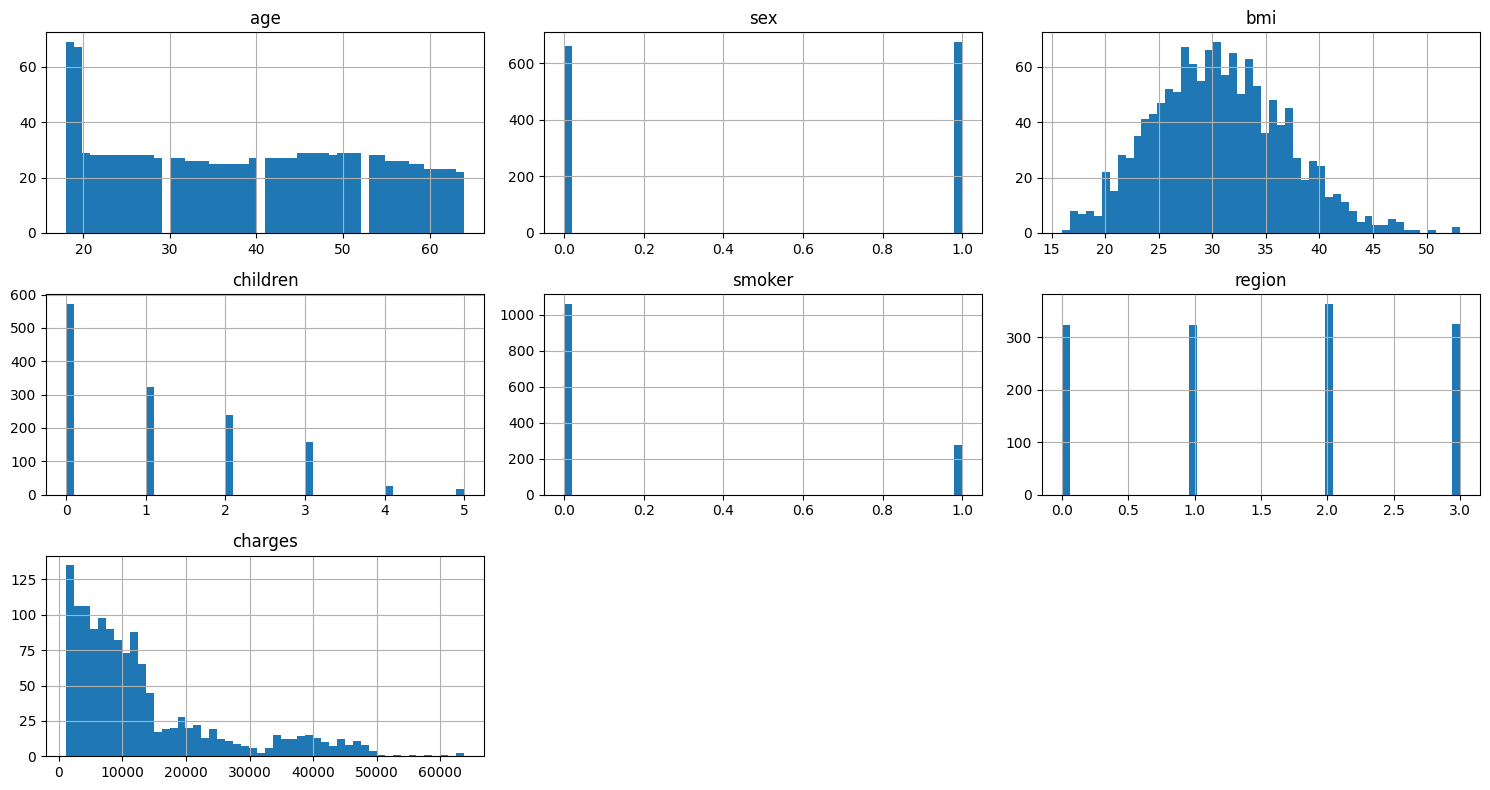

In [ ]:
# Histograma de todas as colunas numéricas
df.hist(bins=50, figsize=(15, 8))
plt.tight_layout()
plt.show()

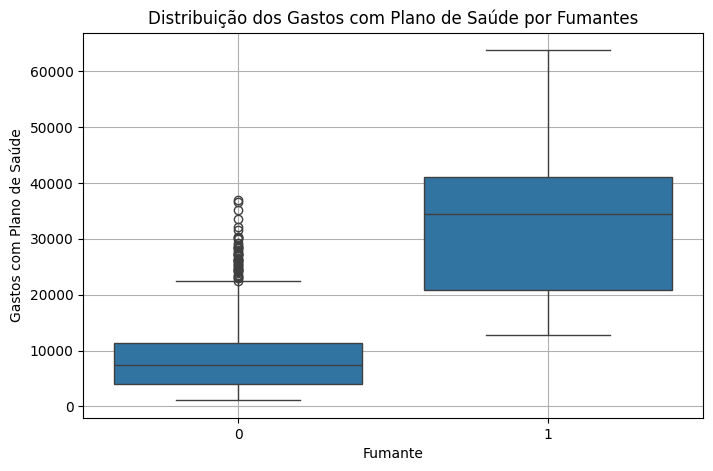

In [ ]:
# Gráfico de boxplot para comparar charges entre fumantes e não fumantes
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Distribuição dos Gastos com Plano de Saúde por Fumantes")
plt.xlabel("Fumante")
plt.ylabel("Gastos com Plano de Saúde")
plt.grid(True)
plt.show()

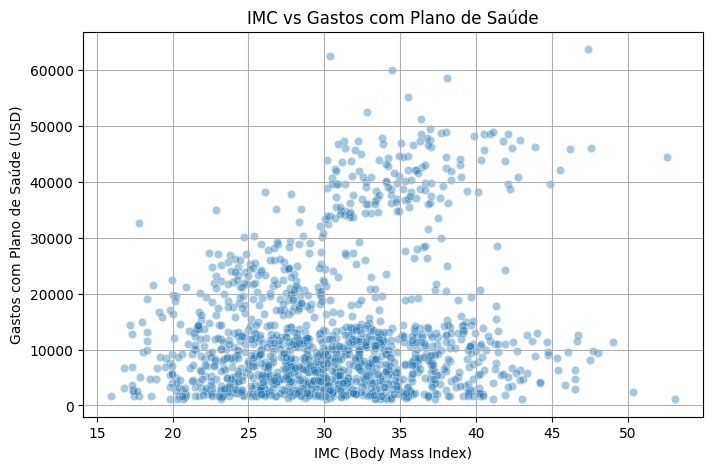

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Como o IMC afeta o valor do plano de saúde?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.4)
plt.title("IMC vs Gastos com Plano de Saúde")
plt.xlabel("IMC (Body Mass Index)")
plt.ylabel("Gastos com Plano de Saúde (USD)")
plt.grid(True)
plt.show()


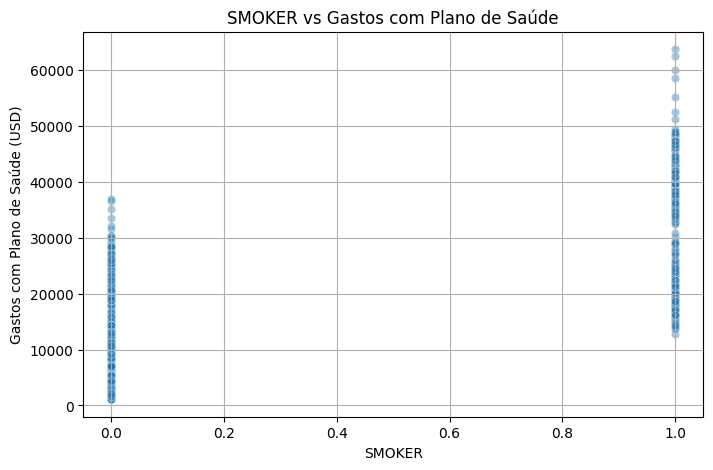

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Como o fator fumante afeta o valor do plano de saúde?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='smoker', y='charges', alpha=0.4)
plt.title("SMOKER vs Gastos com Plano de Saúde")
plt.xlabel("SMOKER")
plt.ylabel("Gastos com Plano de Saúde (USD)")
plt.grid(True)
plt.show()

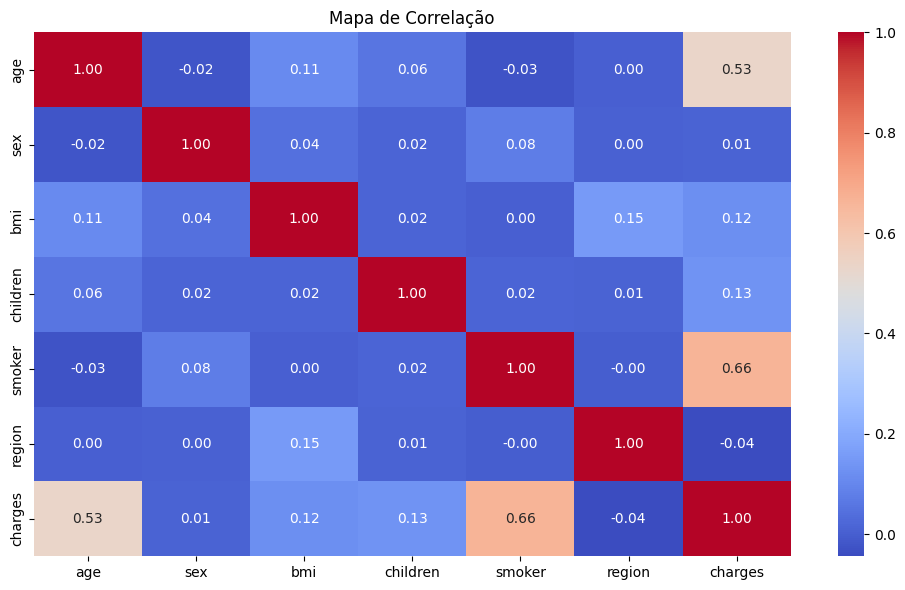

In [ ]:
# Correlação com Spearman
corr_matrix = df.corr(method='spearman')

# Visualização do heatmap das colunas
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Mapa de Correlação")
plt.tight_layout()
plt.show()

In [ ]:
# Ranking das variáveis mais correlacionadas com 'charges'
print("\nCorrelação com 'charges' (ordem decrescente):\n")
print(corr_matrix['charges'].sort_values(ascending=False))


Correlação com 'charges' (ordem decrescente):

charges     1.000000
smoker      0.663611
age         0.533523
children    0.132200
bmi         0.119585
sex         0.010748
region     -0.044142
Name: charges, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variável alvo (target)
y = df['charges']

# Conversão de variáveis categóricas em variáveis dummy (one-hot encoding)
df_encoded = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)

# Features (atributos preditores)
X = df_encoded

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Padronização dos dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Função para avaliação de modelos
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Mean Absolute Error (Erro Absoluto Médio) -> MAE:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (Erro Quadrático Médio) -> MSE:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (Raiz do Erro Quadrático Médio) -> RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("Coeficiente de Determinação (R-quadrado) -> R² Score:", r2_score(y_true, y_pred))

# Regressão Linear
lr = LinearRegression()
lr.fit(pd.DataFrame(X_train_scaled, columns=X.columns), y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model("Linear Regression", y_test, y_pred_lr)

# Regressão KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model("KNN Regression", y_test, y_pred_knn)

# Árvore de Decisão
tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
evaluate_model("Decision Tree Regression", y_test, y_pred_tree)

# Rede Neural (PyTorch)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Definindo arquitetura da rede
input_dim = X_train_scaled.shape[1]

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Instanciando modelo, otimizador e função de custo
model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# DataLoader para treinamento em batch
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)

# Treinamento da rede
for epoch in range(100):
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Avaliação no conjunto de teste
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).squeeze().numpy()

evaluate_model("Neural Network (PyTorch)", y_test, y_pred_nn)



Linear Regression
Mean Absolute Error (Erro Absoluto Médio) -> MAE: 4182.3531552883
Mean Squared Error (Erro Quadrático Médio) -> MSE: 35493102.611650534
Root Mean Squared Error (Raiz do Erro Quadrático Médio) -> RMSE: 5957.608799816461
Coeficiente de Determinação (R-quadrado) -> R² Score: 0.8068466322629111

KNN Regression
Mean Absolute Error (Erro Absoluto Médio) -> MAE: 3102.3946927873135
Mean Squared Error (Erro Quadrático Médio) -> MSE: 24893518.464290127
Root Mean Squared Error (Raiz do Erro Quadrático Médio) -> RMSE: 4989.340483900665
Coeficiente de Determinação (R-quadrado) -> R² Score: 0.8645295403218781

Decision Tree Regression
Mean Absolute Error (Erro Absoluto Médio) -> MAE: 2755.7225209088183
Mean Squared Error (Erro Quadrático Médio) -> MSE: 24006653.59482258
Root Mean Squared Error (Raiz do Erro Quadrático Médio) -> RMSE: 4899.658518184975
Coeficiente de Determinação (R-quadrado) -> R² Score: 0.869355856525893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Neural Network (PyTorch)
Mean Absolute Error (Erro Absoluto Médio) -> MAE: 3066.5255123277752
Mean Squared Error (Erro Quadrático Médio) -> MSE: 22623120.666019876
Root Mean Squared Error (Raiz do Erro Quadrático Médio) -> RMSE: 4756.376842305483
Coeficiente de Determinação (R-quadrado) -> R² Score: 0.8768850389559937


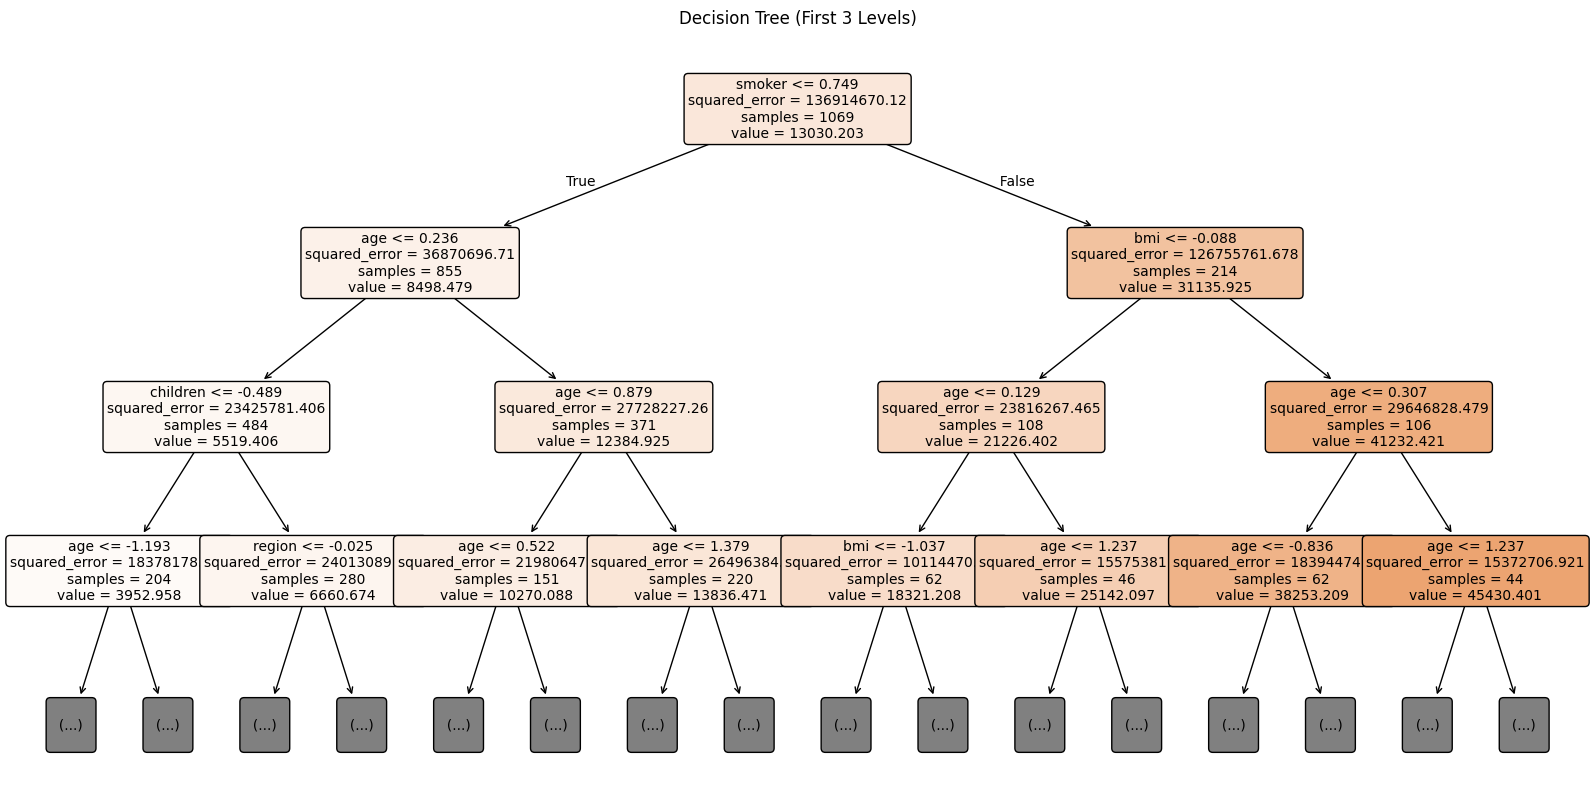

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


SHAP Summary for Linear Regression:


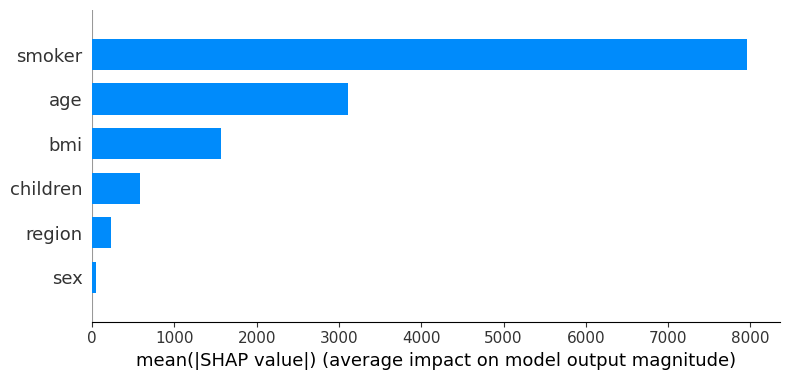


SHAP Summary for Decision Tree:


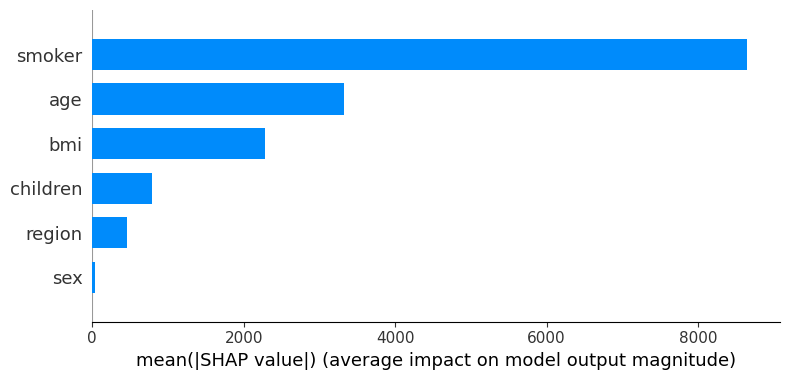

In [ ]:
import shap

X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Linear Regression SHAP
explainer_lr = shap.Explainer(lr.predict, X_test_df)
shap_values_lr = explainer_lr(X_test_df)

print("\nSHAP Summary for Linear Regression:")
shap.summary_plot(shap_values_lr, X_test_df, plot_type="bar")

# Decision Tree SHAP
explainer_tree = shap.Explainer(tree, X_test_df)
shap_values_tree = explainer_tree(X_test_df)

print("\nSHAP Summary for Decision Tree:")
shap.summary_plot(shap_values_tree, X_test_df, plot_type="bar")

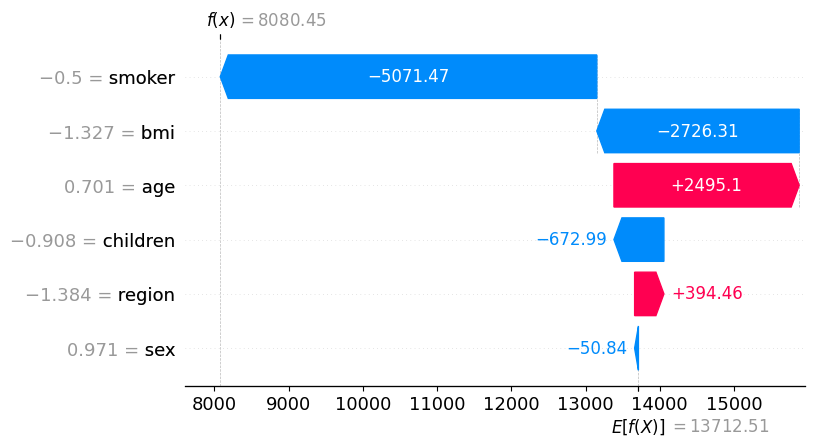

In [ ]:
idx = 0
single_example = X_test_df.iloc[[idx]]

shap_value_single = explainer_lr(single_example)
shap.plots.waterfall(shap_value_single[0])